<a href="https://colab.research.google.com/github/Viktoria574/Statistics/blob/main/PZMS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Рост  МР  Число
0   173.0   4      4
1   187.0   2      1
2   183.0   6      4
3   173.0   6      0
4   169.0   9      1
5   182.0   4      7
6   184.0   6      8
7   178.0   5      5
8   183.0   2      7
9   186.0   5      1
10  165.0   5      3
11  179.5   7      0
12  163.0   4      5
13  170.0   2      3
14  170.0   5      4
15  168.0   2      2
16  172.0   5      5
17  173.0   9      6
18  170.0   5      3
19  184.0  10      7
20  182.0   3      6
21  187.9  10      3
22  180.0   2      5
23  165.0   4      6
24  184.0   3      6
25  175.0   4      1
26  191.0  12      8
27  173.0  10      4
Абсолютная частота частота 0    2
1    4
2    1
3    4
4    4
5    4
6    4
7    3
8    2
Name: count, dtype: int64
Относительная частота 0    0.071429
1    0.142857
2    0.035714
3    0.142857
4    0.142857
5    0.142857
6    0.142857
7    0.107143
8    0.071429
Name: count, dtype: float64


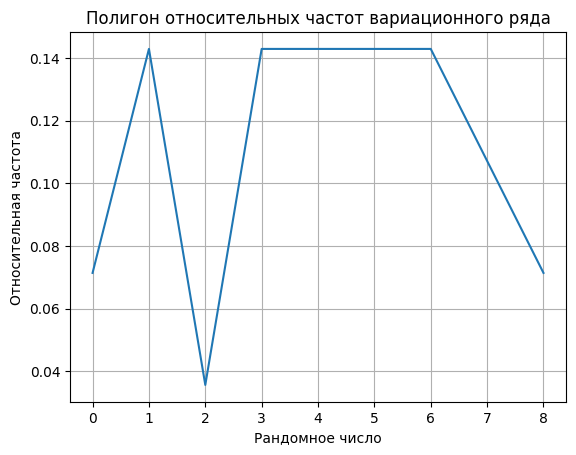

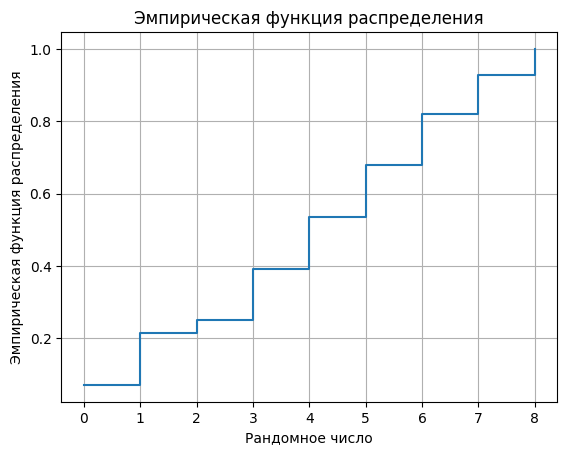

Выборочное среднее:  4.107142857142857
Выборочная дисперсия:  5.728835978835979
Выборочное стандартного отклонения:  2.3934986899591104
Выборочная медиана 4.0
Коэффициент вариации 58.27648984248269


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Загрузка данных
data = pd.read_excel('pr1.xlsx')
print(data)

# Сортировка данных
random_numbers = sorted(data['Число'])

# Подсчет абсолютных частот
absolute_count = pd.Series(random_numbers).value_counts().sort_index()

# Подсчет относительных частот
relative_count = absolute_count / len(random_numbers)

print('Абсолютная частота частота', absolute_count)
print('Относительная частота', relative_count)

# Построение полигона относительных часто
plt.plot(relative_count.index, relative_count.values)
plt.title('Полигон относительных частот вариационного ряда')
plt.xlabel('Рандомное число')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()

# Вычисление эмпирической функции
cdf = np.cumsum(absolute_count.values) / len(random_numbers)

# Визуализация эмпирической функции распределения
plt.step(absolute_count.index, cdf, where='post')
plt.xlabel('Рандомное число')
plt.ylabel('Эмпирическая функция распределения')
plt.title('Эмпирическая функция распределения')
plt.grid(True)
plt.show()


# Подсчет выборочного среднего
print('Выборочное среднее: ', statistics.mean(random_numbers))

# Подсчет выборочной дисперсии
print('Выборочная дисперсия: ', statistics.variance(random_numbers, xbar=None))

# Подсчет выборочного стандартного отклонения
print('Выборочное стандартного отклонения: ', statistics.stdev(random_numbers, xbar=None))

# Подсчет выборочной медианы
print('Выборочная медиана', statistics.median(random_numbers))

# Подсчет коэффициента вариации
print('Коэффициент вариации', statistics.stdev(random_numbers, xbar=None) / statistics.mean(random_numbers)*100)


Число групп (интервалов) по правилу Стёрджесса: 6
Границы интервалов: [160.66666667 165.33333333 170.         174.66666667 179.33333333
 184.         188.66666667 193.33333333]
                    Абсолютная частота  Относительная частота
Рост                                                         
[160.667, 165.333)                   3               0.107143
[165.333, 170.0)                     2               0.071429
[170.0, 174.667)                     8               0.285714
[174.667, 179.333)                   2               0.071429
[179.333, 184.0)                     6               0.214286
[184.0, 188.667)                     6               0.214286
[188.667, 193.333)                   1               0.035714


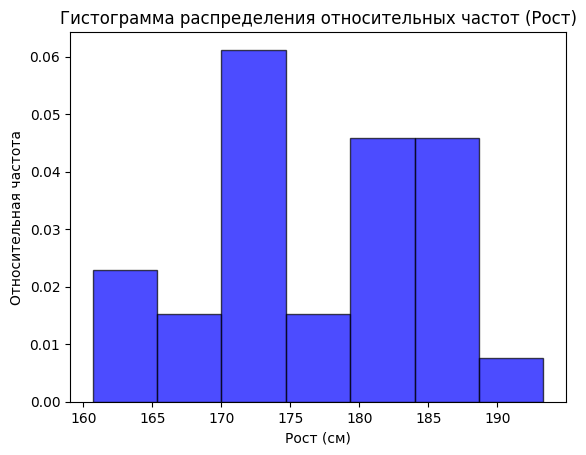

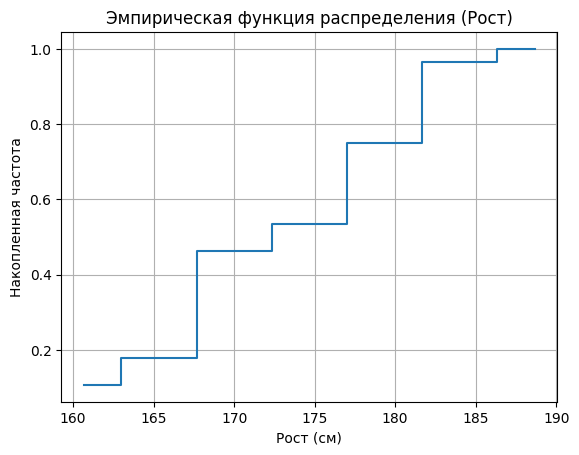

Рост
[160.667, 165.333)    0.107143
[165.333, 170.0)      0.178571
[170.0, 174.667)      0.464286
[174.667, 179.333)    0.535714
[179.333, 184.0)      0.750000
[184.0, 188.667)      0.964286
[188.667, 193.333)    1.000000
Name: Накопленная частота, dtype: float64
Выборочное среднее:  176.8
Выборочная дисперсия:  61.071851851851854
Выборочное стандартного отклонения:  7.814848165630082
Выборочная медиана 176.5
Коэффициент вариации 4.420162989609774


In [ ]:
height = data['Рост']

# Размер выборки для роста
n = len(data['Рост'])

# Число групп по правилу Стёрджесса
m = round(1 + 3.322 * np.log10(n))
print(f'Число групп (интервалов) по правилу Стёрджесса: {m}')

# Минимальное и максимальное значение роста
min_height = data['Рост'].min()
max_height = data['Рост'].max()

# Подсчет шага интервала
interval_size = (max_height - min_height) / m

# Определение границы интервалов начиная
start = min_height - interval_size / 2
end = max_height + interval_size / 2

# Подсчет границы интервалов
intervals = np.arange(start, end, interval_size)

print(f"Границы интервалов: {intervals}")

# Распределение по интервалам и подсчет частот
absolute_count = pd.cut(data['Рост'], bins=intervals, right=False).value_counts().sort_index()

# Относительные частоты
relative_frequencies = absolute_count / len(data)

# Построение вариационного ряда
interval_variation_series = pd.DataFrame({
    'Абсолютная частота': absolute_count,
    'Относительная частота': relative_frequencies
})
print(interval_variation_series)

# Гистограмма относительных частот
plt.hist(data['Рост'], bins=intervals, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма распределения относительных частот (Рост)')
plt.xlabel('Рост (см)')
plt.ylabel('Относительная частота')
plt.show()

# Накопленная частота для эмпирической функции распределения
interval_variation_series['Накопленная частота'] = interval_variation_series['Относительная частота'].cumsum()

# Построение графика ЭФР
plt.step(intervals[:-1], interval_variation_series['Накопленная частота'], where='mid')
plt.title('Эмпирическая функция распределения (Рост)')
plt.xlabel('Рост (см)')
plt.ylabel('Накопленная частота')
plt.grid(True)
plt.show()

# Выражение для ЭФР
print(interval_variation_series['Накопленная частота'])

# Подсчет выборочного среднего
print('Выборочное среднее: ', statistics.mean(height))

# Подсчет выборочной дисперсии
print('Выборочная дисперсия: ', statistics.variance(height, xbar=None))

# Подсчет выборочного стандартного отклонения
print('Выборочное стандартного отклонения: ', statistics.stdev(height, xbar=None))

# Подсчет выборочной медианы
print('Выборочная медиана', statistics.median(height))

# Подсчет коэффициента вариации
print('Коэффициент вариации', statistics.stdev(height, xbar=None) / statistics.mean(height)*100)
